In [ ]:
#look at the highest multicorrelated features (apart from lifespan)
#exercise-genetic -0.035
#exercise-smoking 0.021 (smoking a positive correlation with exercise?)
#exercise-alcohol -0.024

In [2]:
# all libraries required for the entire EDA

from requests import get
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing. Hence: sns
from seaborn_qqplot import pplot
import pandas as pd

import datetime as dt
from scipy import stats
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

%matplotlib inline
sns.set(color_codes=True)

In [10]:
df_raw= pd.read_csv('data_cleaned.csv',sep=';',skipinitialspace=True)

In [11]:
df_raw.columns

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar',
       'lifespan', 'labels'],
      dtype='object')

In [21]:
analysis_df = df_raw[['genetic', #'length', 'mass', 
                      'exercise', 'smoking', 'alcohol', 
                      #'sugar','lifespan'
                      ]]
analysis_df.head()

,genetic,exercise,smoking,alcohol
0,73.9,0.9,0.0,2.4
1,86.0,1.8,8.1,0.4
2,83.3,1.1,0.8,4.6
3,82.8,4.7,11.8,1.0
4,78.7,1.5,8.3,4.9


In [22]:
#colorfull matrix, showing correlations
df_corr = analysis_df.dropna().corr()
df_corr.style.background_gradient(cmap='RdBu')

,genetic,exercise,smoking,alcohol
genetic,1.000000,-0.035257,-0.015208,-0.013323
exercise,-0.035257,1.000000,0.021186,-0.024523
smoking,-0.015208,0.021186,1.000000,-0.012762
alcohol,-0.013323,-0.024523,-0.012762,1.000000


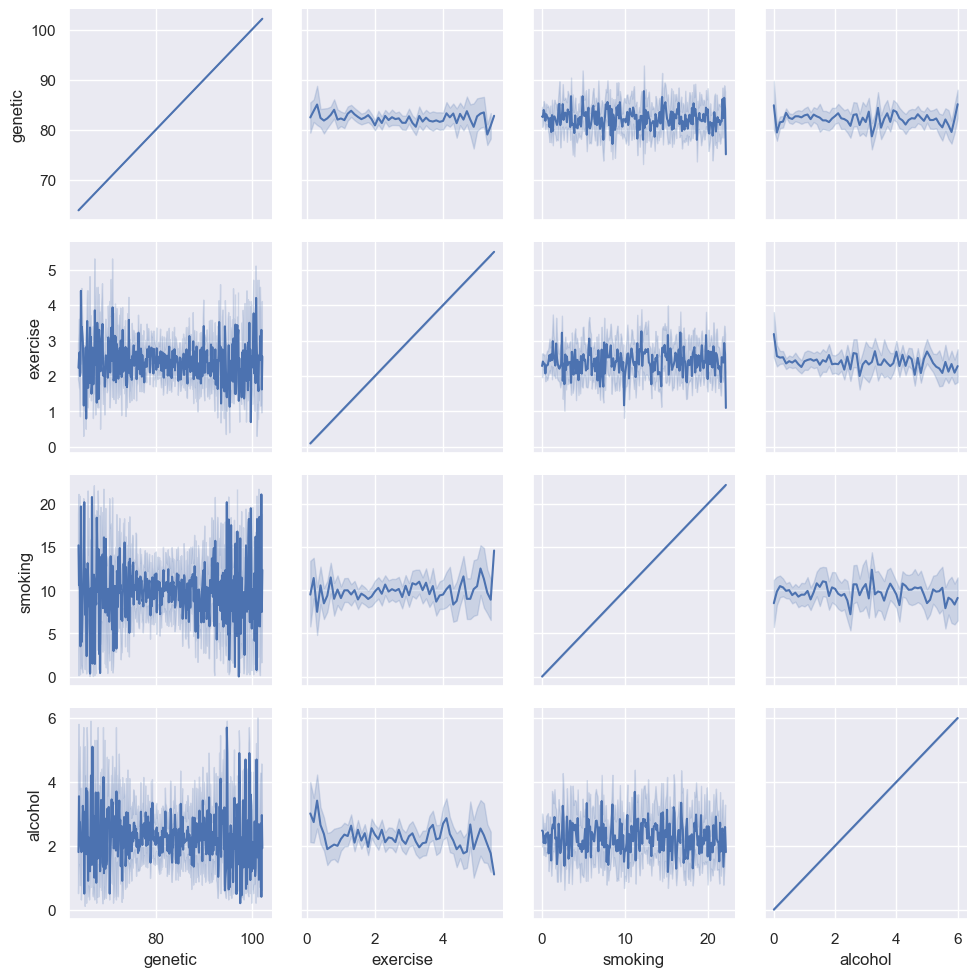

In [25]:
#Quick Overall Graphical Overview (!warning, takes ~2min or more)
g = sns.PairGrid(analysis_df)
g.map(sns.lineplot)

In [32]:
def pearonsstats(pipe):
    r, p = stats.pearsonr(analysis_df.exercise, analysis_df[pipe])
    print(f'{pipe} corr:', round(r, 4)) 
    print(f'{pipe} p-val:', round(p, 4))

pearonsstats('smoking')
pearonsstats('alcohol')
pearonsstats('genetic')

smoking corr: 0.0212
smoking p-val: 0.1757
alcohol corr: -0.0245
alcohol p-val: 0.117
genetic corr: -0.0353
genetic p-val: 0.0242


Rejected smoking and alcohol as linear correlation between exercise, only genetic has linear corr and valid p-value<br>
lets look at the graph:

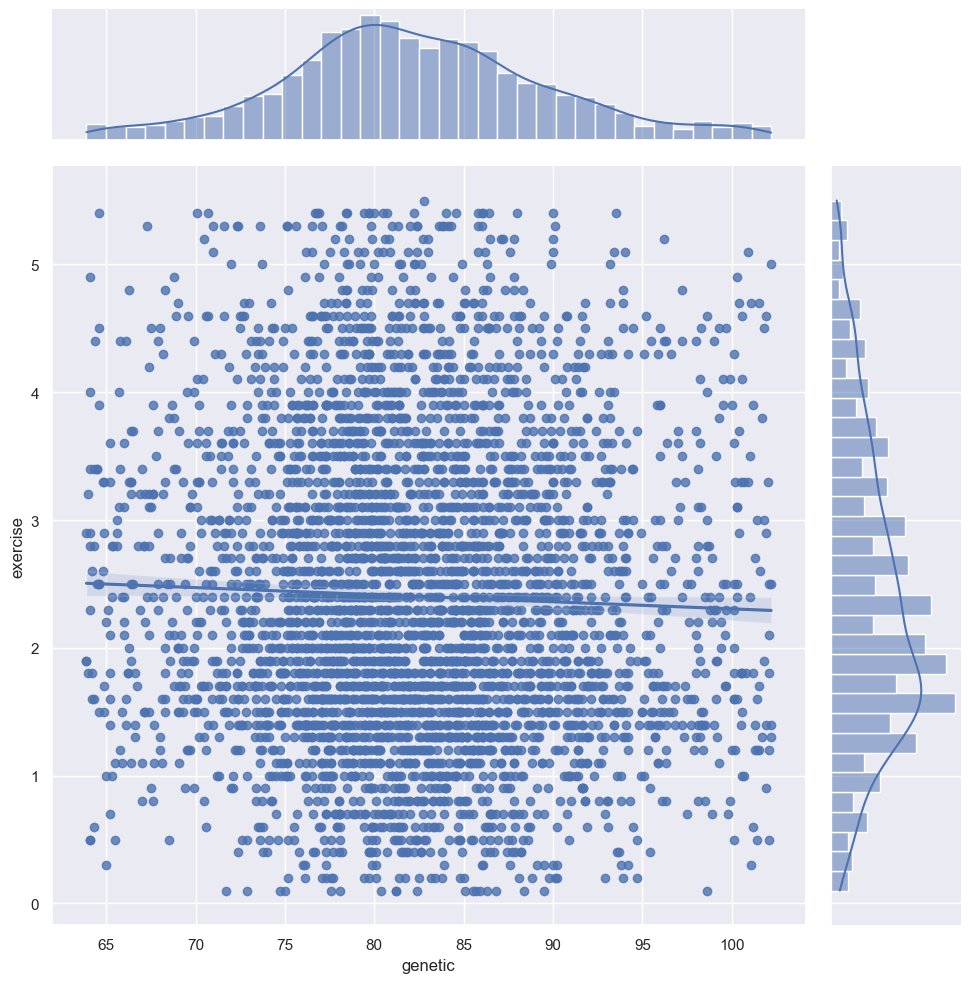

In [38]:
#jointplot with distribution and regression line
sns.jointplot(data=analysis_df, x='genetic', y="exercise",marginal_kws=dict(bins=35), kind='reg',height=10) #height instead of figsize (square)


A really tiny slope, for exercise sake we assume its negative linear in the graph and continue

<h3>Greedy Elimination</h3>
if genetic and exercise are correlated then the feature with the lowest correlation to lifespan is eliminated in this case exercise with 0.08 will be removed (genetic = 0.92)

Lets see if there is a difference in regression accuracy (with and without exercise)

In [39]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [41]:
df_raw.columns

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar',
       'lifespan', 'labels'],
      dtype='object')

In [42]:
temp = df_raw

train, test = train_test_split(temp, test_size=0.2, random_state=0)

X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar']]
y = train.lifespan
regr = linear_model.LinearRegression()
regr.fit(X, y) 
score = regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) with exercise:', score)

coefficient of determination(R²): 0.9748689535819207


In [43]:
temp = df_raw

train, test = train_test_split(temp, test_size=0.2, random_state=0)

X = train[['genetic', 'length', 'mass', 'smoking', 'alcohol', 'sugar']]
y = train.lifespan
regr = linear_model.LinearRegression()
regr.fit(X, y) 
score = regr.score(test[['genetic', 'length', 'mass', 'smoking', 'alcohol', 'sugar']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO})without exercise:', score)

coefficient of determination(R²)without exercise: 0.9582039746226318


Deleting the slightly multicorrelated exercise reduced accuracy of the model therefore we conclude it improves the model and decide to keep exercise despite being multicorrelated <br>
> Reference: "The fact that some or all predictor variables are correlated among themselves does not, in general, inhibit our ability to obtain a good fit nor does it tend to affect inferences about mean responses or predictions of new observations." — Applied Linear Statistical Models, p289, 4th Edition